In [11]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

In [12]:
def linear_regression(x_train,y_train,nume=0.0,den=0.0):
    
    for i in range(x_train.shape[0]):
        nume = nume + (x_train[i] - x_train.mean()) * (y_train[i] - y_train.mean())
        den = den + ((x_train[i] - x_train.mean())**2)
    if den==0:
        print(f"{den} system is undefined")
        return
    else:
        m = nume/den
        b = (y_train.mean() - m * x_train.mean())
        return m,b

In [13]:
def gradient_loss(x_train,y_train,alpha=0.01,m=0.6, b=-2):
    for i in range(x_train.shape[0]):
        y_hat = m*x_train[i]+b
        error = (y_train[i] - y_hat) 
        loss = np.sum((error)**2)
        dm = -error*x_train[i]
        db = -error
        m = m - alpha * dm
        b = b - alpha * db
    return m,b

In [14]:
def predict(x_test,slope,intercept):
    return (slope*x_test+intercept)

In [40]:
def Mean_abs_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [15]:
def shuffle_data(X, y):

    Data_num = np.arange(X.shape[0])
    np.random.shuffle(Data_num)

    return X[Data_num], y[Data_num]

In [16]:
def train_test_split(x, y , ratio=0.2, shuffle = True):
    if shuffle:
        X,Y = shuffle_data(x,y)
    if ratio<1:
        test_ratio = len(Y) - int(len(Y)*ratio)
        x_train, x_test = X[:test_ratio], X[test_ratio:]
        y_train, y_test = Y[:test_ratio], Y[test_ratio:]
    return (x_train,x_test,y_train,y_test)

In [43]:
df = pd.read_csv('C:/Users/VK/Downloads/ml-100k/placement.csv')
df.head()
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])
# print(x[np.random.shuffle(np.arange(x.shape[0]))])

x_train, x_test, y_train, y_test = train_test_split(x, y) # train_test_split(x, y, test_size=0.2, random_state=2)

# slope, intercept = linear_regression(x_train,y_train)
slope, intercept = gradient_loss(x_train,y_train)
print(slope,intercept)
y_pred = predict(x_test,slope, intercept)
print(Mean_abs_error(y_test, y_pred))


0.712784025215207 -1.9503049782222146
0.2782308320035634


Text(0, 0.5, 'Package in LPA')

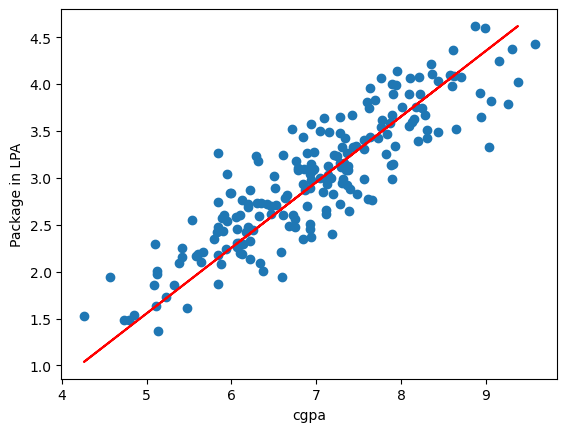

In [20]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,predict(x_train,slope, intercept),color='red')
plt.xlabel('cgpa')
plt.ylabel('Package in LPA')

Linear Regression using S_k_learn


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [61]:
x1=df.iloc[:,0:1]
y1=df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.2, random_state=2)
model = LinearRegression()
model.fit(X_train,Y_train)
# y_pred=model.predict(X_test) 

print(X_test.iloc[0].values.reshape(1,1))
Y_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))
print(root_mean_squared_error(Y_test, Y_pred))

[[8.58]]
0.2884710931878175
0.34827051717731616


In [62]:
Y_check=Y_test>3
Y_pred1=Y_pred>3
print(precision_score(Y_check,Y_pred1))
print(recall_score(Y_check, Y_pred1))

0.85
0.8947368421052632
